In [99]:
# Import Python libraries

# Python Core package for Mathmatical libs
import math
import numpy as np
import pandas as pd

# Python package to read data from yahoo
import pandas_datareader as web
    
# Python package for Data Processing
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Python package for graphical display
import matplotlib.pyplot as plt


In [88]:
# Fetch Apple Stock quote from Yahoo for last 10 Years
df = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end = '2020-12-31')

In [89]:
# # # Display Apple Stock quote data sample
# # df.head

# # Display the number of records and attributes between start='2019-01-01', end = '2020-12-31'
# df.shape


In [90]:
# # Plot the the Historical Apple Stock Prices for duration start='2019-01-01', end = '2020-12-31'

# plt.figure(figsize=(16,8))

# plt.title('Adjusted Close Price - Apple ')
# plt.plot(df['Adj Close'])

# plt.xlabel('Days', fontsize=20)
# plt.ylabel('Adj Close Price', fontsize=20)

In [91]:
#Create dataframe with only relevant Adjusted Close column
data = df.filter(['Adj Close'])

#Covert the dataframe to a numpy array
dataset = data.values

In [92]:
#Scale the data
minmaxScaler = MinMaxScaler(feature_range=(0,1))
scaled_data = minmaxScaler.fit_transform(df)


#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
train_data = scaled_data[0:training_data_len , :]
train_data

array([[0.0320682 , 0.03093382, 0.02672579, 0.03888078, 0.26927344,
        0.03766961],
       [0.        , 0.        , 0.        , 0.        , 0.83841098,
        0.        ],
       [0.00691188, 0.00455282, 0.00134732, 0.01500356, 0.49544354,
        0.01453619],
       ...,
       [0.72257236, 0.74258905, 0.71904856, 0.73673281, 0.20067282,
        0.73506725],
       [0.76184548, 0.75169469, 0.72911662, 0.77469901, 0.41155127,
        0.7725934 ],
       [0.75464056, 0.75670281, 0.75655284, 0.74711423, 0.40005998,
        0.74728618]])

In [93]:
# #Split the data intro x_train and y_train data set and assign numpy arrays
# x_train = []
# y_train = []

# # Consider last 30 days for predicting the values
# for i in range (30, len(train_data)):
#     x_train.append(train_data[i-30:i, 0])
#     y_train.append(train_data[i, 0])
# #     if i <= 31:
# #         print(x_train)
# #         print(y_train)
# #         print()

# #Convert the x_train and y_train to numpy arrays
# x_train, y_train = np.array(x_train), np.array(y_train)

# #Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [94]:
#Split the data intro x_train and y_train data set and assign numpy arrays
x_train = []
y_train = []

# Consider last 30 days for predicting the values
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [95]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data since LSTM model expects 3 dimensional data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(344, 60, 1)

In [100]:
#Apply Long Short Term Model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model, Since its a regression problem we will go with mean squared error as loss func
model.compile(optimizer='adam', loss = 'mean_squared_error')
                                                      

In [101]:
#Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
7/7 [==============================] - 6s 74ms/step - loss: 0.0611
Epoch 2/100
7/7 [==============================] - 0s 70ms/step - loss: 0.0119
Epoch 3/100
7/7 [==============================] - 0s 69ms/step - loss: 0.0082
Epoch 4/100
7/7 [==============================] - 0s 69ms/step - loss: 0.0066
Epoch 5/100
7/7 [==============================] - 1s 82ms/step - loss: 0.0053
Epoch 6/100
7/7 [==============================] - 1s 70ms/step - loss: 0.0049
Epoch 7/100
7/7 [==============================] - 1s 72ms/step - loss: 0.0033
Epoch 8/100
7/7 [==============================] - 0s 71ms/step - loss: 0.0036
Epoch 9/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0034
Epoch 10/100
7/7 [==============================] - 1s 122ms/step - loss: 0.0031
Epoch 11/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0026
Epoch 12/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0030
Epoch 13/100
7/7 [==============================

In [102]:
#Create the validation dataset
test_data= scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [103]:
#Get the models predicted price value
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

ValueError: non-broadcastable output operand with shape (101,1) doesn't match the broadcast shape (101,6)

In [59]:
#Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test )**2)
rmse

117.94255872469137

<ipython-input-61-1713849dd7f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


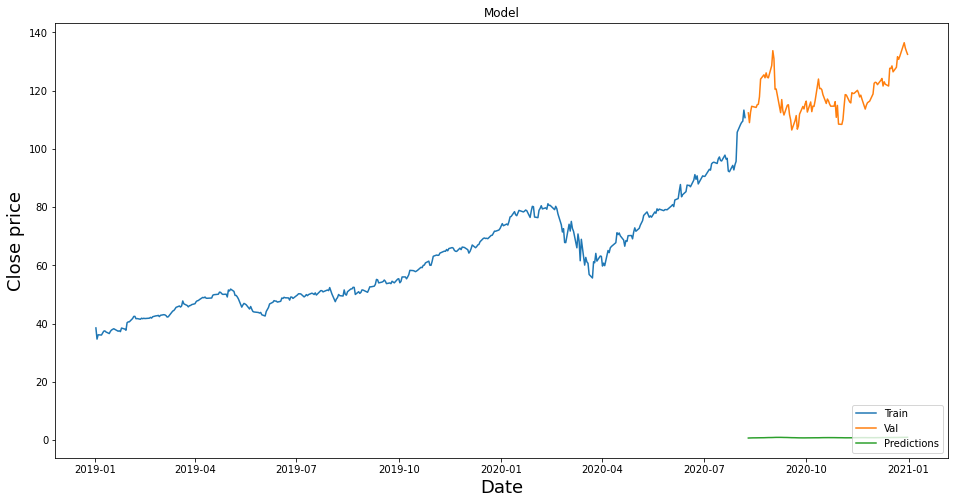

In [61]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2020-11-30,567.599976,524.113159
2020-12-01,584.760010,534.778687
2020-12-02,568.820007,545.363281
2020-12-03,593.380005,554.826782
2020-12-04,599.039978,564.169495
2020-12-07,641.760010,573.223999
2020-12-08,649.880005,583.344543
2020-12-09,604.479980,593.940735
2020-12-10,627.070007,602.663391


In [32]:
#Predict the closing price on Jan/15/2021
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2021-01-15')

#Create new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 days closing price value and convert to an array
last_60_days = new_df[-60:].values
#Scale the data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append past 60 days 
X_test.append(last_60_days_scaled)

#Convert X_test_Data to array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Predicted sales price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

#PRint price
print(pred_price)

[[181.78656]]


In [73]:
#Predict the closing price on Jan/15/2021
apple_quote_actual = web.DataReader('AAPL', data_source='yahoo', start='2021-01-15', end='2021-01-15')

apple_quote_actual

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-15,130.210007,127,128.779999,127.139999,111598531,127.139999
2021-01-15,130.220001,127,128.779999,127.139999,111235300,127.139999
